<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Запрос-1.-Число-книг,-вышедших-после-1-января-2000-год" data-toc-modified-id="Запрос-1.-Число-книг,-вышедших-после-1-января-2000-год-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Запрос 1. Число книг, вышедших после 1 января 2000 год</a></span></li><li><span><a href="#Запрос-2.-Количество-обзоров-и-средняя-оценка-для-каждой-книги" data-toc-modified-id="Запрос-2.-Количество-обзоров-и-средняя-оценка-для-каждой-книги-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Запрос 2. Количество обзоров и средняя оценка для каждой книги</a></span></li><li><span><a href="#Запрос-3.-Издательство-с-наибольшим-числом-книг" data-toc-modified-id="Запрос-3.-Издательство-с-наибольшим-числом-книг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Запрос 3. Издательство с наибольшим числом книг</a></span></li><li><span><a href="#Запрос-4.-Автор-с-самой-высокой-средней-оценкой-книг,-у-которых-от-50-оценок" data-toc-modified-id="Запрос-4.-Автор-с-самой-высокой-средней-оценкой-книг,-у-которых-от-50-оценок-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Запрос 4. Автор с самой высокой средней оценкой книг, у которых от 50 оценок</a></span></li><li><span><a href="#Запрос-5.-Среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок" data-toc-modified-id="Запрос-5.-Среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Запрос 5. Среднее количество обзоров от пользователей, которые поставили больше 50 оценок</a></span></li><li><span><a href="#Выводы-по-заданиям" data-toc-modified-id="Выводы-по-заданиям-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы по заданиям</a></span></li></ul></div>

# SQL 

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Первая задача как аналитика — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Описание данных:**

Таблица `books` содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

Таблица `authors` содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

Таблица `publishers` содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

Таблица `ratings` содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

Таблица `reviews` содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

**Схема базы данных:**

![title](Untitled_(33).png)

**Задания:**
- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

## Загрузка и изучение данных

Импортируем нужные для проекта библиотеки, установим параметры для подключения к БД, сохраним коннектор `engine`.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# устанавливаем параметры
db_config = {'user': '', # имя пользователя
'pwd': '', # пароль
'host': '',
'port': , # порт подключения
'db': ''} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

В базе данных есть следующие таблицы:
* `books` - данные о книгах
* `authors` - данные об авторах
* `publishers` - данные об издательствах
* `ratings` - данные о пользовательских оценках книг
* `reviews` - данные о пользовательских обзорах на книги

Для ознакомления с данными выведем первые 5 строк таблиц и информацию о них. SQL-запросы используем через метод `pd.io.sql.read_sql`.

In [2]:
# запросы всего содержимого таблиц
books = pd.io.sql.read_sql('''SELECT * FROM books''', con=engine)
authors = pd.io.sql.read_sql('''SELECT * FROM authors''', con=engine)
publishers = pd.io.sql.read_sql('''SELECT * FROM publishers''', con=engine)
ratings = pd.io.sql.read_sql('''SELECT * FROM ratings''', con=engine)
reviews = pd.io.sql.read_sql('''SELECT * FROM reviews''', con=engine)
# вывод информации
for data in [books, authors, publishers, ratings, reviews]:
    display(data.head())
    data.info()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


В таблице `books` - данные о 1000 книг, без пропущенных значений. Есть информация о id книги, автора и издателя, названии, числе страниц, дате публикации. В таблице `authors` всего 636 автора, 2 столбца: id автора и его имя. В таблице `publishers` данные о 340 издательствах: id и название.  В `ratings` 6456 строк и 4 столбца: id оценки и книги, имя пользователя, оценка. В таблице `reviews` 2793 обзора, содержится информация о id обзора и книги, имя пользователя и текст обзора.

## Запрос 1. Число книг, вышедших после 1 января 2000 год

Посчитаем, сколько книг вышло после 1 января 2000 года.

In [3]:
# запрос 1
request_1 = pd.io.sql.read_sql(
    '''
    SELECT COUNT(DISTINCT book_id)
    FROM books
    WHERE publication_date >= '2000-01-01'
    '''
    , con=engine)

#вывод информации о таблице
display(request_1)

,count
0,821


Число книг, вышедших c 1 января 2000 года - 821, когда всего в БД их 1000. То есть больше 80% книг вышли после этой даты.

## Запрос 2. Количество обзоров и средняя оценка для каждой книги

Для каждой книги нужно посчитать количество обзоров и среднюю оценку. Для решения этой задачи присоеденим к таблице `books` таблицы `ratings и reviews` методом `LEFT JOIN` по полю `book_id`. Посчитаем среднюю оценку, количество обзоров, отсортируем полученную таблицу по убыванию оценки и выведем на экран.

In [4]:
# запрос 2
request_2 = pd.io.sql.read_sql(
    '''
    SELECT b.book_id, b.title, AVG(r.rating) as avg_rating, COUNT(DISTINCT rv.review_id) as count_review
    FROM books AS b
    LEFT JOIN ratings r ON r.book_id = b.book_id
    LEFT JOIN reviews rv ON rv.book_id = b.book_id
    GROUP BY b.book_id
    ORDER BY AVG(r.rating) DESC
    '''
    , con=engine)

#вывод таблицы
display(request_2)

,book_id,title,avg_rating,count_review
0,86,Arrows of the Queen (Heralds of Valdemar #1),5.00,2
1,901,The Walking Dead Book One (The Walking Dead #...,5.00,2
2,390,Light in August,5.00,2
3,972,Wherever You Go There You Are: Mindfulness Me...,5.00,2
4,136,Captivating: Unveiling the Mystery of a Woman'...,5.00,2
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,2.25,3
996,316,His Excellency: George Washington,2.00,2
997,202,Drowning Ruth,2.00,3
998,371,Junky,2.00,2


Посмотрим на распредление числовых характеристик средней оценки и количества обзоров  помощью гисторамм и метода `describe()`.

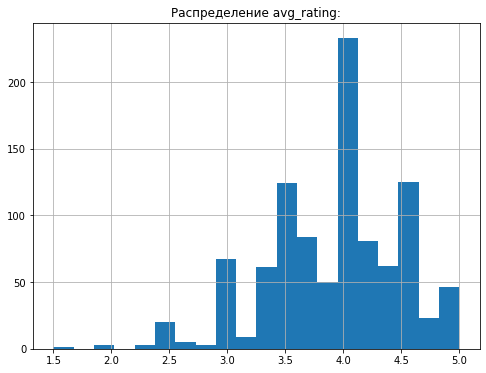

Распределение avg_rating:
count    1000.000000
mean        3.898973
std         0.562376
min         1.500000
25%         3.500000
50%         4.000000
75%         4.333333
max         5.000000
Name: avg_rating, dtype: float64


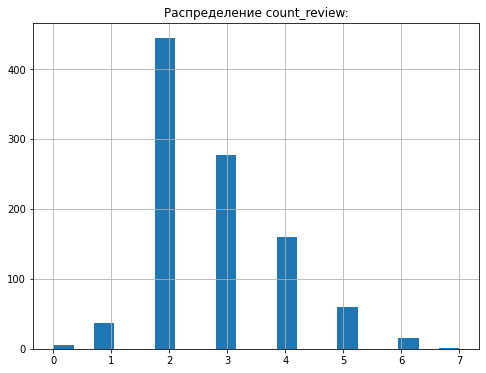

Распределение count_review:
count    1000.000000
mean        2.793000
std         1.074852
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: count_review, dtype: float64


In [5]:
for column in ['avg_rating', 'count_review']:
    request_2[column].hist(figsize=(8,6), bins=20)
    plt.title(f'Распределение {column}:')
    plt.show()
    print(f'Распределение {column}:')
    print(request_2[column].describe())

Число средних оценок и обзоров 1000, то есть у каждой книги есть хотя бы одна оценка и обзор. Средняя оценка 3.9, медианная - 4. Среднее число обзоров на книгу 2.8, медианное - 3, максимальное - 7.

## Запрос 3. Издательство с наибольшим числом книг

Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры.

Сначала сделаем запрос с группировкой по издательтвам, с количеством книг, в которых больше 50 страниц, присоеденим к нему названия издательств. Отсортируем таблицу по убыванию количества книг, введем лимит в одну строку.

In [6]:
# запрос 3
request_3 = pd.io.sql.read_sql(
    '''
    SELECT b.publisher_id, p.publisher, count_books
    FROM (SELECT publisher_id, COUNT(book_id) AS count_books
    FROM books
    WHERE num_pages > 50
    GROUP BY publisher_id) AS b
    LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
    ORDER BY count_books DESC
    LIMIT 1
    '''
    , con=engine)

#вывод таблицы
display(request_3)

,publisher_id,publisher,count_books
0,212,Penguin Books,42


Издательство "Penguin Books" выпустило больше всего книг толще 50 страниц - 42 книги.

## Запрос 4. Автор с самой высокой средней оценкой книг, у которых от 50 оценок

Определим автора с самой высокой средней оценкой книг, учитывать будем только книги с 50 и более оценками.

Напишем запрос с расчеттом средней оценки `mean_rating` и количеством оценок, сгруппируем данные по книгам `book_id`, отберем книги с количесвом оценок больше 50. Присоеденим к результату запроса таблицы `books` и `authors`, сгруппируем данные по автору, посчитем суммарное количество оченок и среднюю оценку, отсортируем по убыванию оценки и оставим первую запись. Выведем запись с полученным автором на экран.

In [7]:
# запрос 4
request_4 = pd.io.sql.read_sql(
    '''
    SELECT a.author_id, a.author, SUM(count_rating) AS count_rating, AVG(mean_rating) AS mean_rating
    FROM (SELECT book_id, AVG(rating) AS mean_rating, COUNT(rating_id) AS count_rating
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(rating_id) >= 50) AS r
    LEFT JOIN books AS b ON b.book_id = r.book_id
    LEFT JOIN authors AS a ON a.author_id = b.author_id
    GROUP BY a.author_id
    ORDER BY mean_rating DESC
    LIMIT 1
    '''
    , con=engine)

#вывод таблицы
display(request_4)

,author_id,author,count_rating,mean_rating
0,236,J.K. Rowling/Mary GrandPré,310.0,4.283844


Автор с самой высокой средней оценкой книг, у которых больше 50 оценок - J.K. Rowling/Mary GrandPré. Количество оценок у всех его книг 310, средняя оценка книг автора - 4.28.

## Запрос 5. Среднее количество обзоров от пользователей, которые поставили больше 50 оценок

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

Сначала напишем запрос на имя пользователей из таблицы `ratings`, у которых число оценок больше 50. Полученные имена передадим в качестве условия `WHERE username IN`. Посчитаем по пользователем число обзоров, передадим полученную таблицу в `FROM`, а затем по ним посчитаем среднее.

In [8]:
# запрос 4
request_4 = pd.io.sql.read_sql(
    '''
    SELECT AVG(count_review)
    FROM (SELECT username, COUNT(review_id) AS count_review
    FROM reviews
    WHERE username IN (SELECT username
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating_id) > 50)
    GROUP BY username) AS r
    '''
    , con=engine)

#вывод таблицы
display(request_4)

,avg
0,24.333333


Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24. Среднее число обзоров таких пользователей как минимум в 2 раза меньше чем число оценок (от 50), но это цифра все равно достаточно большая.

## Выводы по заданиям

1. C 1 января 2000 года вышла 821 книга;
2. Для каждой книги посчитано количество обзоров и средняя оценка. Средняя оценка 3.9. Количество обзоров - 994, среднее число обзоров на книгу 2.8, максимальное - 7;
3. Издательство, которое выпустило наибольшее число книг толще 50 страниц (так мы исключили из анализа брошюры) - "Penguin Books", 42 книги;
4. Автор с самой высокой средней оценкой книг (учитывая только книги с 50 и более оценками) - J.K. Rowling/Mary GrandPré. Количество оценок у всех его книг 310, средняя оценка книг автора - 4.28.
5. Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24.